In [113]:
import numpy as np
import pandas as pd
import ringity as rng
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

from scipy.spatial.distance import squareform

In [2]:
N = 2**9
rho = np.random.uniform(0,0.05)
beta = np.random.uniform()
a = np.random.uniform(0,0.5)

In [20]:
degs = []

for i in range(2**10):
    G = rng.network_model(N, a=a, rho=rho, beta=beta)
    degs.append([deg for (node, deg) in nx.degree(G)])
    
degs = np.array(degs).flatten()

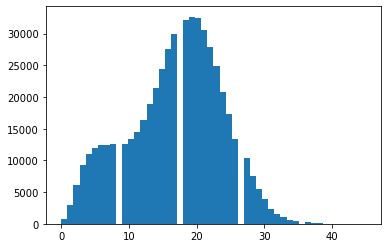

In [22]:
plt.hist(degs, bins=50);

In [48]:
obs_deg_dist = []

for i in range(2**9):
    delas = rng.get_delays(N, beta)
    dists = rng.delays_to_distances(delas)
    simis = rng.distances_to_similarities(dists, a=a)
    probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
    deg_dist = np.sum(squareform(probs) > np.random.uniform(size=[N,N]), axis=1)
    obs_deg_dist.append(deg_dist)
    
obs_deg_dist = np.array(obs_deg_dist).flatten()

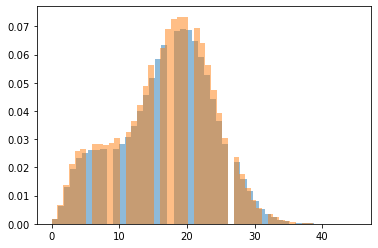

In [50]:
plt.hist(degs        , bins=50, alpha=0.5, density=True);
plt.hist(obs_deg_dist, bins=50, alpha=0.5, density=True);

In [28]:
exp_deg_dist1 = []

for i in range(2**10):
    delas = rng.get_delays(N, beta)
    dists = rng.delays_to_distances(delas)
    simis = rng.distances_to_similarities(dists, a=a)
    probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
    exp_deg_dist1.append(squareform(probs).mean(axis=0)*(N-1))
    
exp_deg_dist1 = np.array(exp_deg_dist1).flatten()

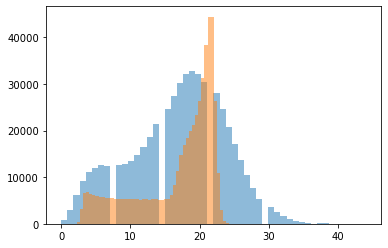

In [37]:
# plt.hist(degs         , bins=50, alpha=0.5);
plt.hist(obs_deg_dist , bins=50, alpha=0.5);
plt.hist(exp_deg_dist1, bins=50, alpha=0.5);

In [45]:
delas = rng.get_delays(2**14, beta)
exp_deg_dist2 = np.vectorize(rng.expected_node_degree)(delas, a=a, rho=rho, 
                                                       parameter=beta, parameter_type='delay')*(N-1)

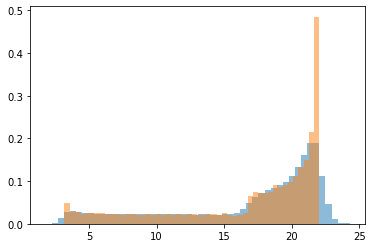

In [46]:
# plt.hist(degs         , bins=50, alpha=0.5, density=True);
# plt.hist(obs_deg_dist , bins=50, alpha=0.5, density=True);
plt.hist(exp_deg_dist1, bins=50, alpha=0.5, density=True);
plt.hist(exp_deg_dist2, bins=50, alpha=0.5, density=True);

## Exploring the parameter landscape

In [116]:
N = 2**10
rho = 0.1
a = 0.1

In [ ]:
for a in (0.1, 0.2, 0.3, 0.4, 0.5):
    df = pd.DataFrame(index=('score', 'LCC'))

    fig, ax = plt.subplots(figsize=(12,12))

    for beta in np.linspace(0.01, 0.99, 5):

        obs_deg_dist = []

        for i in range(2**10):
            delas = rng.get_delays(N, beta)
            dists = rng.delays_to_distances(delas)
            simis = rng.distances_to_similarities(dists, a=a)
            probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
            deg_dist = np.sum(squareform(probs) > np.random.uniform(size=[N,N]), axis=1)
            obs_deg_dist.append(deg_dist)

        obs_deg_dist = np.array(obs_deg_dist).flatten()

        sns.kdeplot(obs_deg_dist, ax=ax, label = f"beta = {beta:.2f}", bw_adjust=2)

        A = squareform(probs) > np.random.uniform(size=[N,N])
        G = nx.from_numpy_array(A)
        S = nx.induced_subgraph(G, max(nx.connected_components(G), key=len))
        score = rng.diagram(S).score
        LCC = len(S)/len(G)

        print(f"beta = {beta:.2f}") 
        print(f"score = {score:.2f}")
        print(f"LCC = {LCC:.2f}")
        print()

        df[beta] = (score, LCC)

    ax.legend()
    ax.set_title(f"a = {a:.2f}", fontsize = 18)

    fig.savefig(f"/Users/dottolab/Desktop/ringity_plots/rho_{rho}_a_{a}.pdf")
    df.to_csv(f"/Users/dottolab/Desktop/ringity_plots/rho_{rho}_a_{a}.csv")

In [100]:
A = squareform(probs) > np.random.uniform(size=[N,N])
G = nx.from_numpy_array(A)

In [101]:
rng.diagram(G).score

0.007943989223752168

In [102]:
beta

0.99

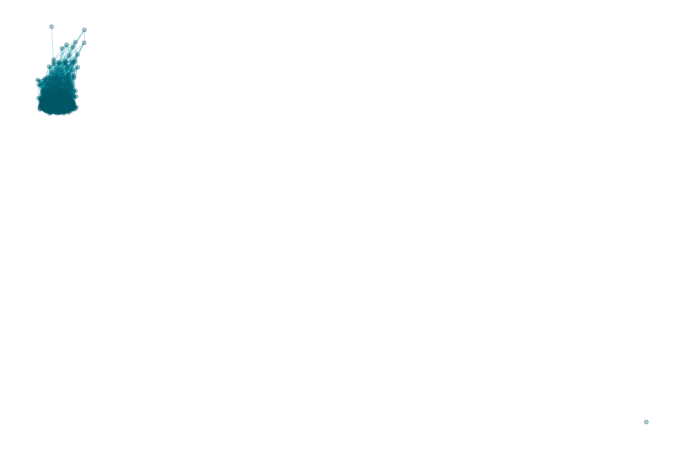

In [108]:
rng.plot_nx(G)